# Approximations with Taylor-series

### Exponential function

$$ e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + … $$

1. Közelítsük 5 tagig az $exp(2)$ függvényt, melyhez használjuk a ```math.factorial()``` függvényt.



In [1]:
import math
ex = 2
ex2 = 1 + ex + (ex**2/math.factorial(2)) + (ex**3/math.factorial(3)) + (ex**4/math.factorial(4))

print(ex2)

7.0


2. Hasonlítsuk össze a valódi értékkel a ```math.exp()``` függvény segítségével.

In [2]:
math.exp(2)

7.38905609893065

3. Írjuk át az előző közelítést ```for``` ciklus felhasználásával.

In [3]:
result = 0
for i in range(0,5):
        result += 2**i / math.factorial(i)
print(result)

7.0


4. Közelítsük 10 tagig és nézzük meg a közelítés hibáját.

In [4]:
sum = 0
x = 2
for i in range (0,9):
    sum += (x**i)/math.factorial(i)

print(sum)
print(math.exp(2))

7.387301587301587
7.38905609893065


5. Írjuk át függvénnyé az előző ```for``` ciklust, melynek inputja legyen $k$, a közelítéshez felhasznált tagok száma.

In [5]:
def exp(k):
    result = 0
    for i in range(0, k):
        result += 2**i / math.factorial(i)
    return result

print(exp(5))

7.0


6. Állítsuk be az $exp$ függvény $x$ kitevőjét is a függvény argumentumának.

In [6]:
def exp(x, k):
    result = 0
    for i in range(0, k):
        result += x**i / math.factorial(i)
    return result

print(exp(2, 5))

7.0


7. Számoljuk ki és mentsük el egy listába az $exp(5)$ függvényérték közelítését 10 tagig. Mentsük el a közelítés hibáját is minden lépésben egy listába.

In [7]:
kozelites = [exp(5,i) for i in range(1,10)]
print(kozelites)
hiba = [math.exp(5) - exp(5,i) for i in range(1,10)]
print(math.exp(5))
print(hiba)

[1.0, 6.0, 18.5, 39.33333333333333, 65.375, 91.41666666666667, 113.11805555555556, 128.61904761904762, 138.30716765873015]
148.4131591025766
[147.4131591025766, 142.4131591025766, 129.9131591025766, 109.07982576924327, 83.0381591025766, 56.99649243590993, 35.29510354702104, 19.79411148352898, 10.105991443846449]


8. Ábrázoljuk a közelítés értékeit és külön ábrán a hiba értékeit is.

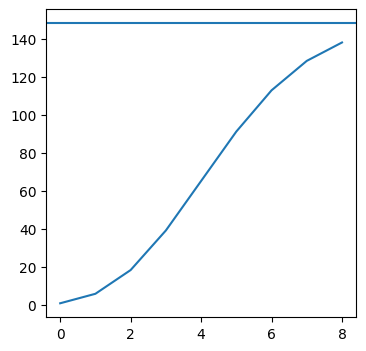

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.plot(kozelites)
plt.axhline(math.exp(5))
plt.show()

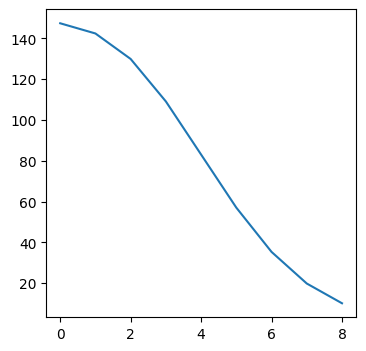

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.plot(hiba)
plt.show()

9. Számoljuk ki, hogy hány lépésre van szükség ahhoz, hogy a közelítés és a valódi függvényérték 1-nél kisebb távolságra legyen egymástól.

In [10]:
def expl(k, x):
    kozelitl = []
    hibal = []
    ex5 = math.exp(5)
    result = 0
    for i in range(0, k):
        result += x**i / math.factorial(i)
        kozelitl.append(result)
        hibal.append(ex5 - result)
    return (kozelitl, hibal)

t = expl(10, 5)
kl = t[0]
hl = t[1]
vege = hl[-1]
k = 10
x = 5
while (vege > 1):
    t = expl(k, x)
    hl = t[1]
    vege = hl[-1]
    if (vege > 1):
        k += 1
print("Még", k - 10, "lépés van hátra")



Még 2 lépés van hátra


In [11]:
i=1
hiba = 10
while hiba > 1:
  kozelites = exp(5,i)
  i +=1
  hiba = math.exp(5) - kozelites

print(i-1)


12



### Sinus function

$$ \sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} … $$

Számítsuk ki a $sin$ függvény közelítését 1, 2, 3 és 4 tagig. Ábrázoljuk az eredeti függvényt és a négy közelítését.

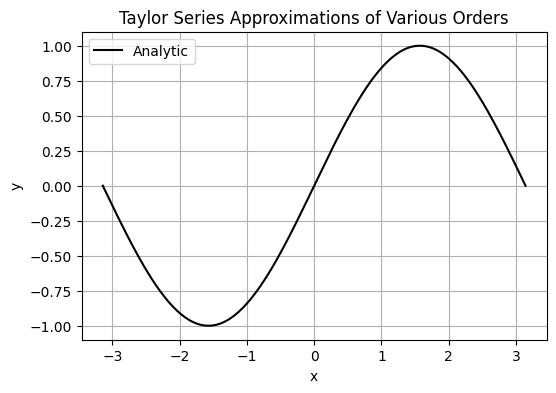

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn-poster')

x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Third Order', 'Fifth Order', 'Seventh Order']

plt.figure(figsize = (6,4))

# ide írjuk be a sin(x) 4 különböző közelítését és kirajzolását


plt.plot(x, np.sin(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

C:\Users\Márton\AppData\Local\Temp\ipykernel_24072\1685509776.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


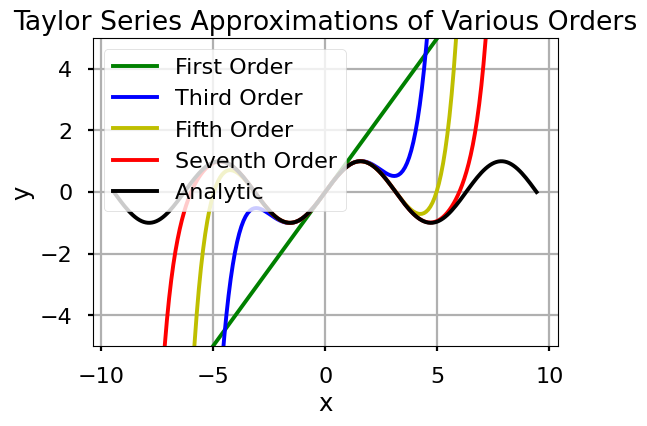

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
def Tsinx(array_like, db):
    l = []
    for x in array_like:
        res = 0
        for i in range(db):
            res += (-1)**i * (x*x**(i*2))/math.factorial(2*i+1)
        l.append(res)
    return np.array(l)
x = np.linspace(-3*np.pi, 3*np.pi, 200)
#y = np.zeros(len(x))
labels = ['First Order', 'Third Order', 'Fifth Order', 'Seventh Order']
cols = ['g', 'b', 'y', 'r']
plt.figure(figsize = (6,4))
# ide írjuk be a sin(x) 4 különböző közelítését és kirajzolását
for i in range(4):
    plt.plot(x, Tsinx(x,2*i+1), cols[i], label = labels[i])
plt.plot(x, np.sin(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5, 5])
plt.legend()
plt.show()

### Cosinus function

$$ \cos x = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} … $$

Írjunk függvényt, mely x és n függvényében közelíti a $cos(x)$ értéket $n$ tagú Taylor-polinommal, majd ábrázoljuk $n=1,2,3,4$ esetén.



C:\Users\Márton\AppData\Local\Temp\ipykernel_24072\2255724583.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


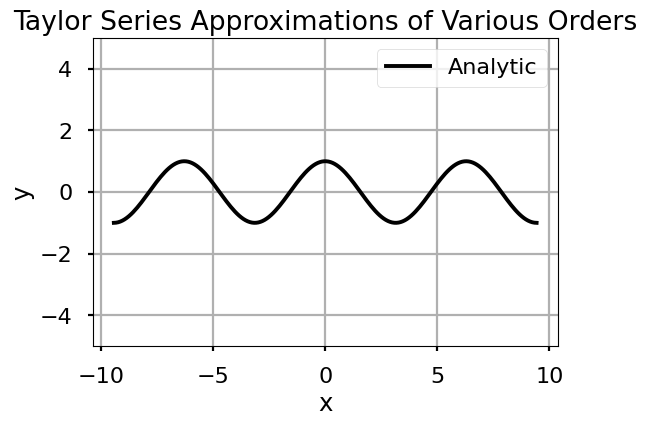

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

labels = ['Zero Order', 'Second Order', 'Fourth Order', 'Sixth Order']

plt.figure(figsize = (6,4))

# az x vektor legyen -2pi és 2pi között 200 egyenlő távolságra levő pont
# a fenti függvény segítségével rajzoljuk ki a cos(x) közelítő függvényeit a 6-od rendű tagig

plt.plot(x, np.cos(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5, 5])
plt.legend()
plt.show()

C:\Users\Márton\AppData\Local\Temp\ipykernel_24072\1558012014.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


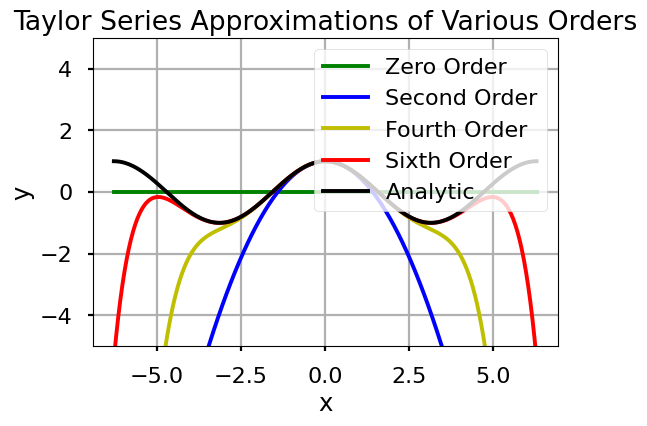

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
def Tcosx(array_like, db):
    l = []
    for x in array_like:
        res = 0
        for i in range(db):
            res += (-1)**i * (x**(i*2))/math.factorial(2*i)
        l.append(res)
    return np.array(l)
labels = ['Zero Order', 'Second Order', 'Fourth Order', 'Sixth Order']
cols = ['g', 'b', 'y', 'r']
plt.figure(figsize = (6,4))
# az x vektor legyen -2pi és 2pi között 200 egyenlő távolságra levő pont
x = np.linspace(-2*math.pi,2*math.pi,200)
# a fenti függvény segítségével rajzoljuk ki a cos(x) közelítő függvényeit a 6-od rendű tagig
for i in range(4):
    plt.plot(x, Tcosx(x,2*i), cols[i], label = labels[i])
plt.plot(x, np.cos(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5, 5])
plt.legend()
plt.show()

# Gradient descent

Gradient descent is an iterative optimization algorithm used to minimize the cost function of a model by adjusting its parameters in the direction of steepest descent of the cost function's gradient.


1. Legyen $(x+5)^2$ egy adott hibafüggvény. Keressük meg a minimumát a gradiens módszer segítségével! Első lépésként ábrázoljuk a hibafüggvényt.

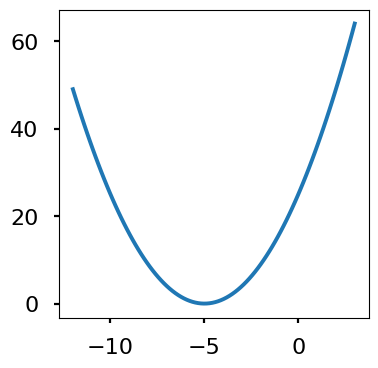

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(x): return (x+5)**2

X = np.linspace(-12, 3, 100)
Y = f(X)
plt.figure(figsize = (4,4))
plt.plot(X,Y)
plt.show()

Initialize the parameters
- $ X_0 = 3 $
- learning rate $ = 0.01$
- precision $= 0.00001$
- maximum number of iterations $= 1000$
- $\frac{dy}{dx}  = \frac{d}{dx} (x+5)^2 = 2(x+5)$

Iteration steps
- $X_n = X_{n-1} - \text{learning rate} ⋅ \frac{dy}{dx}$


In [17]:
current_x = 3 # The algorithm starts at x=3
rate = 0.01 # Learning rate
precision = 0.00001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 1000 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(x+5) #Gradient of our function
steps = []

In [18]:
while previous_step_size > precision and iters < max_iters:
    prev_x = current_x #Store current x value in prev_x
    current_x = current_x - rate * df(prev_x) #Grad descent
    previous_step_size = abs(current_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    steps.append(previous_step_size)
    #print("Iteration",iters,"\nX value is",current_x) #Print iterations

print("The local minimum occurs at", current_x)

The local minimum occurs at -4.999518238161995


Ábrázoljuk a kapott hibaértékeket a lépések számának függvényében.

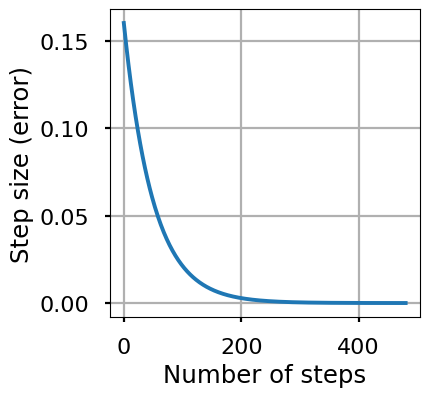

In [19]:
plt.figure(figsize = (4,4))
plt.plot(steps)
plt.grid()
plt.xlabel('Number of steps')
plt.ylabel('Step size (error)')
plt.show()

2. Nézzünk meg egy másik példát. A feladat: adott három pont és keressük meg a rájuk legjobban, minimális hibával illeszkedő egyenest.

- $X_1 = (1,2)$
- $X_2 = (2,3)$
- $X_3 = (3,3.5)$

A hibafüggvény (cost function) adja meg a különbséget a modell által becsült pontok és az eredeti adathalmaz pontjai között. Erre általában a Mean Squared Error (MSE) függvény alkalmazzuk. A pontokra illesztett egyenes leírható a meredekségével $m$ és a hozzáadott konstanssal $b$: $y=mx+b$. Legyen $n$ a pontok darabszáma. A cél a hibafüggvény $J(m,b)$ minimalizálása $m$-re és $b$-re nézve.

$$ J(m,b) = \frac{1}{2n} \sum_{i=1}^n (y_i-(mx_i +b))^2.$$

A gradiens módszer lépéseihez szükségünk van a függvény deriváltjára $m$ szerint és $b$ szerint, ezek segítségével tudjuk kiszámolni az optimális lineáris függvény következő becsült értékeit.

$$ m_{k+1} = m_k - \alpha \frac{\delta J}{\delta m}$$

$$ b_{k+1} = b_k - \alpha \frac{\delta J}{\delta b}$$

ahol $\alpha$ a tanulási ráta.

A parciális deriváltak:
$$ \frac{\delta J}{\delta m} = -\frac{1}{n} \sum_{i=1}^n x_i (y_i-(mx_i - b))$$

$$ \frac{\delta J}{\delta b} = -\frac{1}{n} \sum_{i=1}^n x_i (y_i-(mx_i - b))$$




Először ábrázoljuk az adott pontokat.

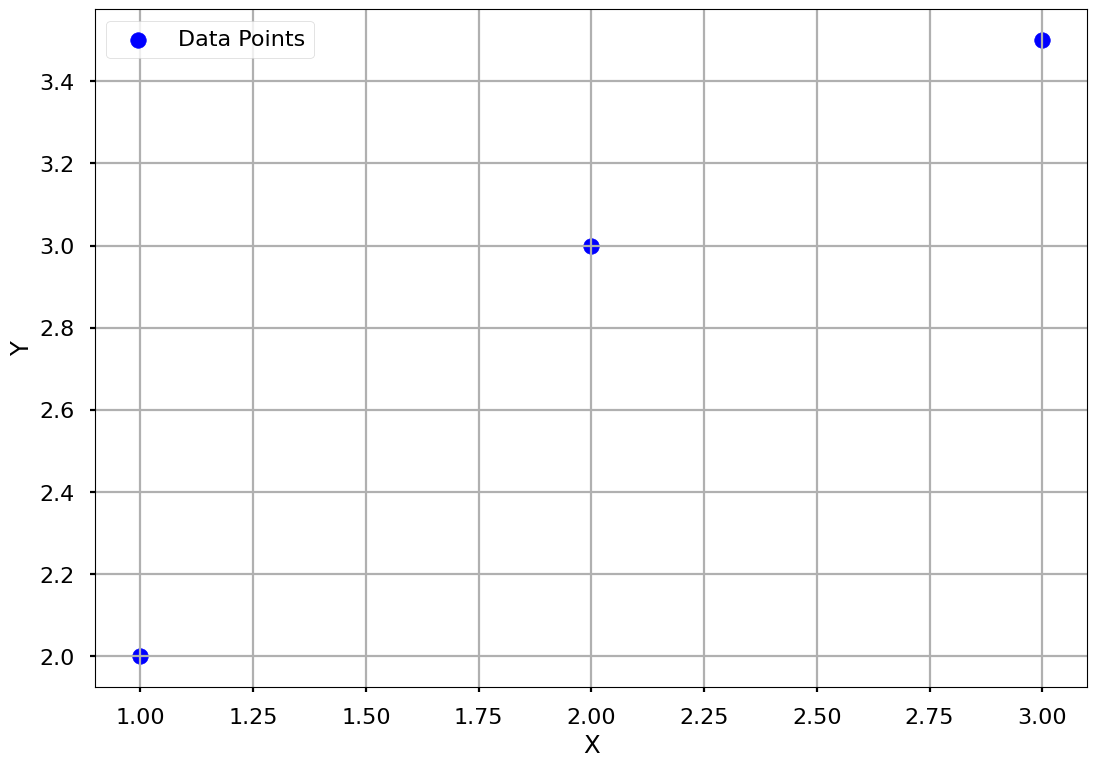

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
X = np.array([1, 2, 3])  # Features
y = np.array([2, 3, 3.5])  # Target

# Plot the data points
plt.scatter(X, y, color='blue', label='Data Points')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

Adott kezdeti paraméterek mellett hajtsuk végre az optimalizálást.

Epoch 0: Cost=0.7083333333333333, m=0.975, b=1.9883333333333333
Epoch 100: Cost=0.01922074821106829, m=0.569715678970661, b=1.7470407566641313
Epoch 200: Cost=0.0165901741894052, m=0.5888822610989185, b=1.6996047223115947
Epoch 300: Cost=0.014527965208725853, m=0.6071356000721232, b=1.658097737488027
Epoch 400: Cost=0.01290664628948418, m=0.6233246927272339, b=1.6212960818967435
Epoch 500: Cost=0.011631957269414982, m=0.6376792838626361, b=1.588664722061857
Epoch 600: Cost=0.010629790404770082, m=0.650407241631954, b=1.559731082349388
Epoch 700: Cost=0.009841881817828906, m=0.6616928928123061, b=1.5340761445278037
Epoch 800: Cost=0.009222424157356697, m=0.671699676686927, b=1.5113283726894935
Epoch 900: Cost=0.008735403455364624, m=0.6805725119281661, b=1.4911583326291171
Final parameters: m=0.6883658131388337, b=1.4734423271643535


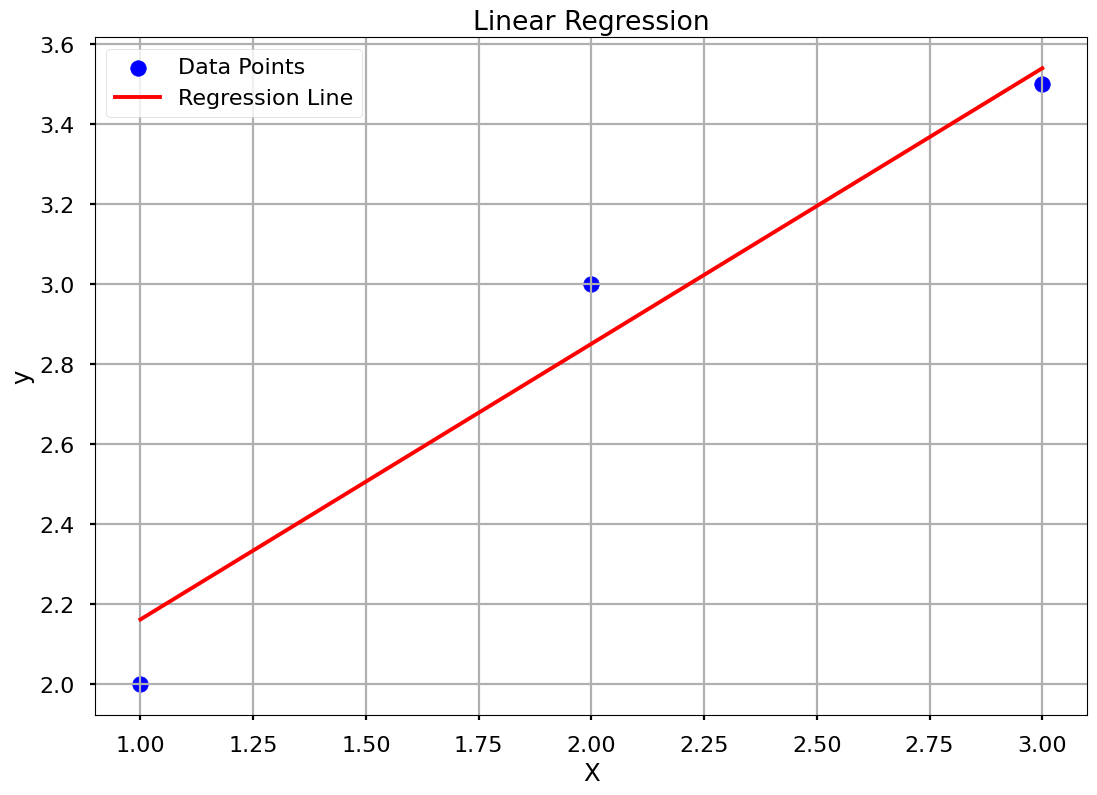

In [21]:
# Initialize parameters
m = 1  # Slope
b = 2  # Intercept

# Define hyperparameters
learning_rate = 0.01
epochs = 1000

# Perform gradient descent
n = len(X)
for epoch in range(epochs):
    # Compute predictions
    y_pred = m * X + b

    # Compute gradients
    grad_m = (-1/n) * np.sum(X * (y - y_pred))
    grad_b = (-1/n) * np.sum(y - y_pred)

    # Update parameters
    m -= learning_rate * grad_m
    b -= learning_rate * grad_b

    # Compute cost (mean squared error)
    cost = (1/(2*n)) * np.sum((y_pred - y)**2)

    # Print progress
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Cost={cost}, m={m}, b={b}')

print(f'Final parameters: m={m}, b={b}')

# Plot the data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(X, m*X + b, color='red',  label='Regression Line')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

Ábrázoljuk a három dimenziós (két paraméter mentén optimalizálandó) hibafüggvényt.

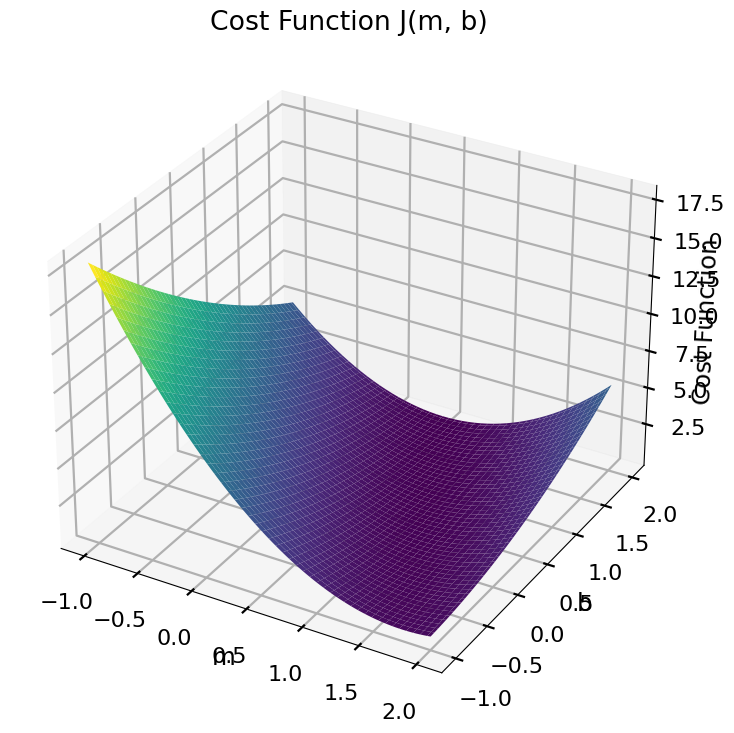

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the cost function
def cost_function(X, y, m, b):
    n = len(X)
    y_pred = m * X + b
    return (1/(2*n)) * np.sum((y_pred - y)**2)

# Generate values for m and b
m_vals = np.linspace(-1, 2, 100)
b_vals = np.linspace(-1, 2, 100)
M, B = np.meshgrid(m_vals, b_vals)
J_vals = np.array([cost_function(X, y, m, b) for m, b in zip(np.ravel(M), np.ravel(B))])
J_vals = J_vals.reshape(M.shape)

# Plot the cost function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, J_vals, cmap='viridis')
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('Cost Function')
ax.set_title('Cost Function J(m, b)')
plt.show()
